# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [12]:
# ファイルをダウンロードする
!curl -O https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!curl -O https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!curl -O https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                 

                Dload  Upload   Total   Spent    Left  Speed
100  154k  100  154k    0     0  1315k      0 --:--:-- --:--:-- --:--:-- 1421k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  197k  100  197k    0     0  2190k      0 --:--:-- --:--:-- --:--:-- 2296k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  147k  100  147k    0     0  1683k      0 --:--:-- --:--:-- --:--:-- 1756k
Archive:  794_ruby_4237.zip
  inflating: text/sanshiro.txt       
Archive:  1746_ruby_18324.zip
Made with WinArchiver Lite (http://www.tida.bz/macwinzipper)
  inflating: text/sorekara.txt       
Archive:  785_ruby_1656.zip
  inflating: text/mon.txt            


In [13]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [14]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [15]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [16]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
azurehound                 macmon                     sfsexp
bruno-cli                  mago                       slepc
crates-tui                 marisa                     slepc-complex
dry                        mmdbctl                    spytrap-adb
fairy-stockfish            parca                      starlark-rust
fzf-make                   parlay                     talosctl
gopeed                     pixi-pack                  tenere
graphql-inspector          posting                    tomcat@10
idsgrep                    qbec                       tzdb
kool                       rapidyaml                  vals
kubernetes-cli@1.31        replxx                     versitygw
kubetrim            

In [17]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

To reinstall 9.5, run:
  brew reinstall coreutils


In [18]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

To reinstall 9.5, run:
  brew reinstall coreutils


In [10]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

In [20]:
import spacy

input_fn = "text/all.corpus.txt"
output_fn = "text/all.wakati.txt"

nlp = spacy.load("ja_ginza")

with open(input_fn, "r") as fin, open(output_fn, "w") as fout:
    for line in fin:
        tokens = [token.text for token in nlp(line.rstrip())]
        fout.write(' '.join(tokens) + "\n") # 分かち書きを作成

In [22]:
# ファイルを読み込み、テキストを一行ずつ解析
all_tokens = [] # のちに分析対象となる単語たち
with open(input_fn, "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)

from collections import Counter

# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",
              "ゐる", "来る", "事", "見る", "御", "云ふ", "云う",) # 追加

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords)

# 出現頻度top 20を出力する
for word, count in counter.most_common(20):
    print(f"{count:>5} {word}")



  845 時
  782 自分
  779 出る
  680 聞く
  636 行く
  619 言う
  590 つ
  581 中
  572 人
  564 上
  562 所
  535 米
  502 気
  498 方
  472 女
  465 出す
  456 あり
  443 顔
  432 前
  415 つう


## ワードクラウド

In [23]:
# 準備
# 日本語フォントのダウンロード（Linuxのみ-->macだから大丈夫だと思うが一応）

if sys.platform == "linux":
    !sudo apt update
    !sudo apt install fonts-ipaexfont

if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

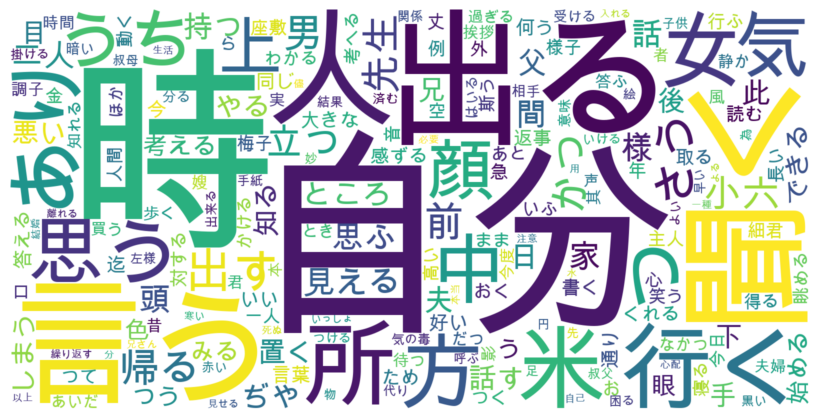

In [25]:
# your code goes here
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud_assignment1.png", dpi=300)
plt.show()

In [26]:
# 微調整（分析対象とする品詞と不要語を指定する）

include_pos = ("NOUN", "VERB", "ADJ", "?????")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",
              "ゐる", "来る", "事", "見る", "御", "云ふ", "云う",) # 追加

words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

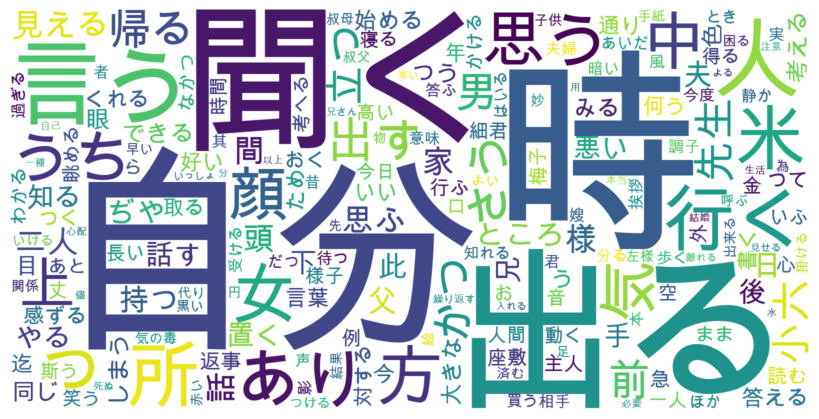

In [27]:
# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 共起ネットワーク

In [28]:
# your code goes here
# 準備：必要ライブラリと便利関数の定義
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words

def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X

def find_sentence_by_cooccurrence(X, idxs):
    """
    指定された共起を含む文を見つける
    """
    occur_flags = (X[:, idxs[0]] > 0)
    for idx in idxs[1:]:
        occur_flags = occur_flags.multiply(X[:, idx] > 0)

    return occur_flags.nonzero()[0]


def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

def nx2pyvis_G(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyvisで描画する
    """
    pyvis_G = Network(width="800px", height="800px", notebook=True)
    for node, attrs in G.nodes(data=True):
        pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
    for node1, node2, attrs in G.edges(data=True):
        pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

    return pyvis_G


In [29]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",
              "ゐる", "来る", "事", "見る", "御", "云ふ", "云う",) # 追加

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

# 共起ランキングを出力する
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

# 指定した共起を含む文のリストを出力する
sents_orig = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = list(doc.sents)
        sents_orig.extend(tmp)

# すべての単語の通し番号を求める
words_lookup = { word: index for index, word in enumerate(words) }

# 共起語を指定する
lookup_words = ["野々宮", "美禰子"]

# 指定した共起語のインデックスを求める
idxs = list(map(lambda x: words_lookup[x], lookup_words))

# 指定した共起を含む文のリストを出力する
for i in find_sentence_by_cooccurrence(X, idxs):
    print(f"{i:>5d}: {sents_orig[i]}")

120 (先生, 広田)
105 (三千代, 代助)
 99 (つう, 代助)
 95 (かつ, 代助)
 94 (代助, 平岡)
 85 (あり, 代助)
 83 (代助, 自分)
 82 (三四郎, 言う)
 76 (代助, 思ふ)
 71 (三四郎, 美禰子)
 69 (代助, 聞く)
 68 (三四郎, 思う)
 67 (三四郎, 与次郎)
 62 (つう, 仕舞)
 62 (宗助, 自分)
 60 (与次郎, 言う)
 59 (宗助, 帰る)
 58 (宗助, 聞く)
 56 (三四郎, 聞く)
 56 (代助, 出る)
 3001: その影が折戸の外へ隠れると、美禰子は急に思い出したように「そうそう」と言いながら、庭先に脱いであった下駄をはいて、野々宮のあとを追いかけた。
 3237: 話は野々宮と美禰子のあいだに起こりつつある。
 3303: 歩きながら考えると、いまさき庭のうちで、野々宮と美禰子が話していた談柄が近因である。
 4395: 野々宮さんの妹といっしょに美禰子もいるだろう。
 4691: 　三四郎はその時はじめて美禰子から野々宮のおっかさんが国へ帰ったということを聞いた。
 4692: おっかさんが帰ると同時に、大久保を引き払って、野々宮さんは下宿をする、よし子は当分美禰子の家から学校へ通うことに、相談がきまったんだそうである。
 4700: 絶えず往来しているうちには野々宮さんと美禰子との関係も次第次第に移ってくる。
 4729: 美禰子の野々宮に対する賛辞のつづきは、ざっとこうである。
 4738: 自分が、野々宮に対するほどな尊敬を美禰子から受けえないのは当然である。
 4859: 美禰子のそばに野々宮さんを置くとなお苦しんでくる。
 4861: だから先生の所へ来ると、野々宮さんと美禰子との関係がおのずから明瞭になってくるだろうと思う。
 5881: 美禰子は呼ばれた原口よりは、原口より遠くの野々宮を見た。
 6634: 　三四郎は美禰子からもれて、よし子に伝わって、それが野々宮さんに知れているんだと判じた。
 8172: 野々宮さんが立つとともに、美禰子のうしろにいたよし子の姿も見えた。


In [30]:
# ネットワークを作る
G = create_network(words, word_counts, Xc, 0.01)

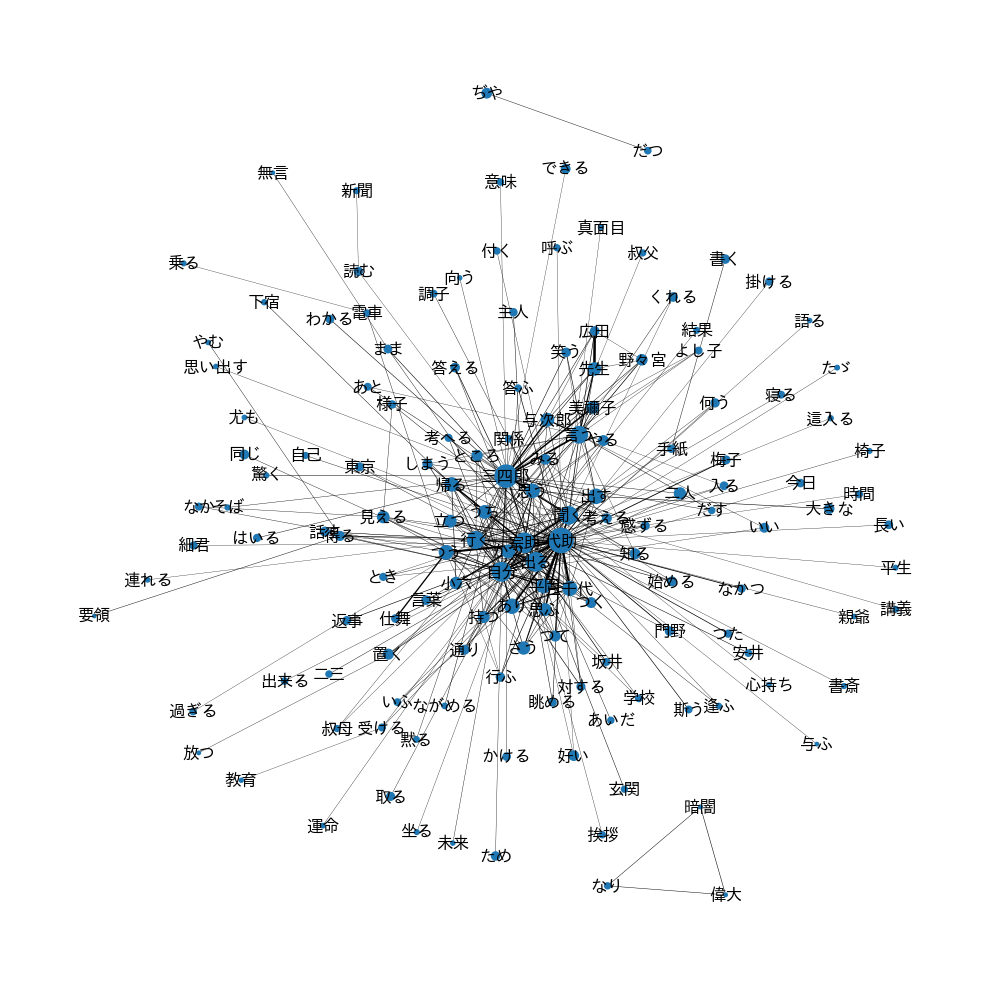

In [31]:
# 静的ビジュアライゼーション
pyplot_network(G)

In [32]:
# インタラクティブなビジュアライゼーション
pyvis_G = nx2pyvis_G(G)
pyvis_G.show_buttons()
pyvis_G.show("network_assignment.html")

network_assignment.html


## 共起ヒートマップ

In [ ]:
# your code goes here
# 文章を解析し、共起を求める
include_pos = ("NOUN", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",
              "ゐる", "来る", "事", "見る", "御", "云ふ", "云う",) # 追加

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

# 行名を用意する

columns = set(Xc.nonzero()[0])
columns_text = [words[i] for i in columns]

# すべて0のデータフレームを用意する

import pandas as pd

df = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns_text, columns=columns_text)

# データフレームに頻度を入れる

for cord, count in counter.items():
    df.iloc[cord] = count

# 登場人物名のみを取り出す

characters = ["三四郎", "広田", "野々宮", "佐々木", "与次郎", "美禰子", "先生", "原口", "里見"]
df_characters = df[characters].filter(items=characters, axis=0)



In [34]:
import plotly.express as px

fig = px.imshow(df_characters, color_continuous_scale=px.colors.sequential.Oranges,
                title="『三四郎』の登場人物", width=800, height=800)
fig.update_layout(font=dict(size=16))
fig.show()
fig.write_image("./heatmap_assignment.png", scale=2)

ValueError: --plotlyjs argument is not a valid URL or file path: 